In [1]:
from IPython.display import display, Image

### Getting More Out of Queries

#### Filtering queries using `WHERE`

The format for filtering you have learned thus far only tests equality, where you must specify values for the properties to test with. What if you wanted more flexibility about how the query is filtered? For example, you want to retrieve all movies released after 2000, or retrieve all actors born after 1970 who acted in movies released before 1995. Most applications need more flexibility in how data is filtered.

The most common clause use to filter queries is the `WHERE` clause that follows a `MATCH` clause. In the `WHERE` clause, you can place conditions that are evaluated at runtime to filter the query.

Previous way,
```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie {released: 2008})
RETURN p, m
```

Here is one way you specify the same query using the `WHERE` clause,
```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE m.released = 2008
RETURN p, m
```

Here are the examples using the `WHERE` clause,

```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE m.released = 2008 OR m.released = 2009
RETURN p, m
```

Specifying ranges in `WHERE` clauses,

```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE m.released >= 2003 AND m.released <= 2004
RETURN p.name, m.title, m.released
```

Here is the same query different way,

```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE 2003 <= m.released <= 2004
RETURN p.name, m.title, m.released
```

Here are the examples about the `WHERE` clause in the `Movie` graph,

```
// returns all person nodes in the graph
MATCH (p)
WHERE p:Person
RETURN p.name
```

```
// returns all person nodes acted in the movie named as The Matrix
MATCH (p)-[:ACTED_IN]->(m)
WHERE p:Person AND m:Movie AND m.title = 'The Matrix'
RETURN p.name
```

#### Testing the existence of a property

Suppose we only want to return the movies that the actor, Jack Nicholson acted in with the condition that they must all have a tagline,

```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE p.name = 'Jack Nicholson' AND exists(m.tagline)
RETURN m.title, m.tagline
```

#### Testing strings

Cypher has a set of string-related keywords that you can use in your WHERE clauses to test string property values. You can specify `STARTS WITH`, `ENDS WITH`, and `CONTAINS`.

```
MATCH (p:Person)-[:ACTED_IN]->()
WHERE p.name STARTS WITH 'Michael'
RETURN p.name
```

Note that the comparison of strings is **case-sensitive**. There are a number of string-related functions you can use to further test strings. For example, if you want to test a value, regardless of its case, you could call the `toLower()` function to convert the string to lower case before it is compared.

```
MATCH (p:Person)-[:ACTED_IN]->()
WHERE toLower(p.name) STARTS WITH 'michael'
RETURN p.name
```

**Important:** In this example where we are converting a property to lower case, if an index has been created for this property, it will not be used at runtime.

#### Testing with regular expressions
If you prefer, you can test property values using regular expressions. You use the syntax **=~** to specify the regular expression you are testing with. Here is an example where we test the name of the `Person` using a regular expression to retrieve all `Person` nodes with a name property that begins with `Tom`,

```
MATCH (p:Person)
WHERE p.name = ~'Tom.*'
RETURN p.name
```

#### Testing with patterns

Suppose we want to find persons who wrote the movie but didn't direct it,

```
MATCH (p:Person)-[:WROTE]->(m:Movie)
WHERE NOT exists((p)-[:DIRECTED]->(m))
RETURN p.name, m.title
```

Here is another example where we want to find Gene Hackman and the movies that he acted in with another person who also directed the movie,

```
MATCH (gene:Person)-[:ACTED_IN]->(m:Movie)<-[:ACTED_IN]-(other:Person)
WHERE gene.name = 'Gene Hackman'
AND exists((other)-[:DIRECTED]->(m))
RETURN  gene, other, m
```

#### Testing with list values

You can define the list in the `WHERE` clause. During the query, the graph engine will compare each property with the values `IN` the list. You can place either numeric or string values in the list, but typically, elements of the list are of the same type of data. If you are testing with a property of a string type, then all the elements of the list should be strings.

```
MATCH (p:Person)
WHERE p.born IN [1965, 1970]
RETURN p.name as name, p.born as yearBorn
```

You can also compare a value to an existing list in the graph.

We know that the `:ACTED_IN` relationship has a property, roles that contains the list of roles an actor had in a particular movie they acted in. Here is the query we write to return the name of the actor who played *Neo* in the movie *The Matrix*,

```
MATCH (p:Person)-[r:ACTED_IN]->(m:Movie)
WHERE  'Neo' IN r.roles AND m.title = 'The Matrix'
RETURN p.name
```

#### Specifying multiple `MATCH` patterns

This `MATCH` clause includes a pattern specified by two paths separated by a comma,

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie),
      (m:Movie)<-[:DIRECTED]-(d:Person)
WHERE m.released = 2000
RETURN a.name, m.title, d.name
```

If possible, you should write the same query as follows,

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)<-[:DIRECTED]-(d:Person)
WHERE m.released = 2000
RETURN a.name, m.title, d.name
```

#### Using two MATCH patterns

Here are some examples of specifying two paths in a `MATCH` clause. In the first example, we want the actors that worked with *Keanu Reeves* to meet *Hugo Weaving*, who has worked with *Keanu Reeves*. Here we retrieve the actors who acted in the same movies as *Keanu Reeves*, but not when *Hugo Weaving* acted in the same movie. To do this, we specify two paths for the `MATCH`,

```
MATCH (keanu:Person)-[:ACTED_IN]->(movie:Movie)<-[:ACTED_IN]-(n:Person),
     (hugo:Person)
WHERE keanu.name = 'Keanu Reeves' AND
      hugo.name = 'Hugo Weaving'
AND NOT (hugo)-[:ACTED_IN]->(movie)
RETURN n.name
```

Here is another example where two patterns are necessary. Suppose we want to retrieve the movies that *Meg Ryan* acted in and their respective directors, as well as the other actors that acted in these movies. Here is the query to do this,

```
MATCH (meg:Person)-[:ACTED_IN]->(m:Movie)<-[:DIRECTED]-(d:Person),
      (other:Person)-[:ACTED_IN]->(m)
WHERE meg.name = 'Meg Ryan'
RETURN m.title as movie, d.name AS director , other.name AS `co-actors`
```

You can find the result of last cypher as follows, 

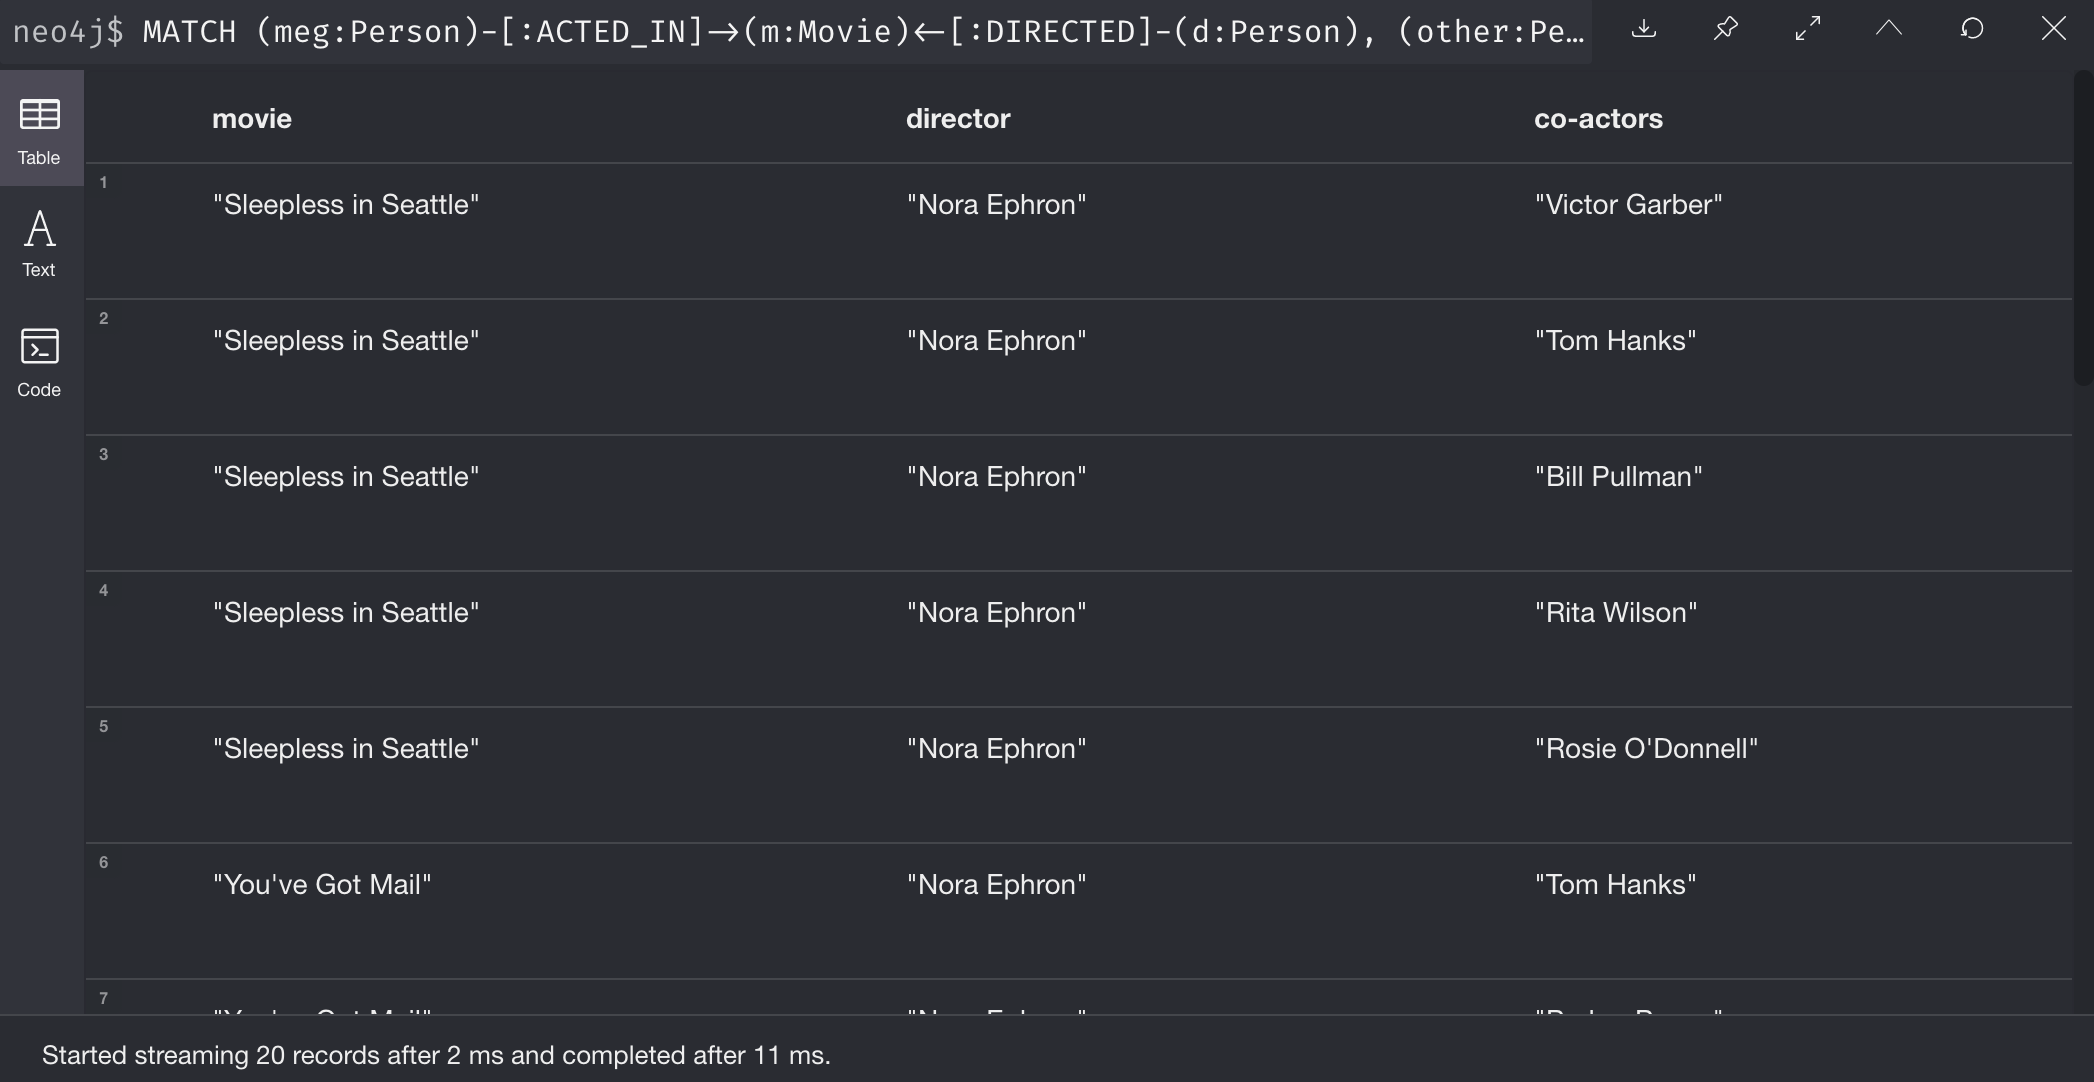

In [2]:
Image('images/meg_coactors.png', width=600)

#### Setting path variables

What if we want to see the result of above query as graph?

```
MATCH megPath = (meg:Person)-[:ACTED_IN]->(m:Movie)<-[:DIRECTED]-(d:Person),
      (other:Person)-[:ACTED_IN]->(m)
WHERE meg.name = 'Meg Ryan'
RETURN megPath
```

Here is the result,

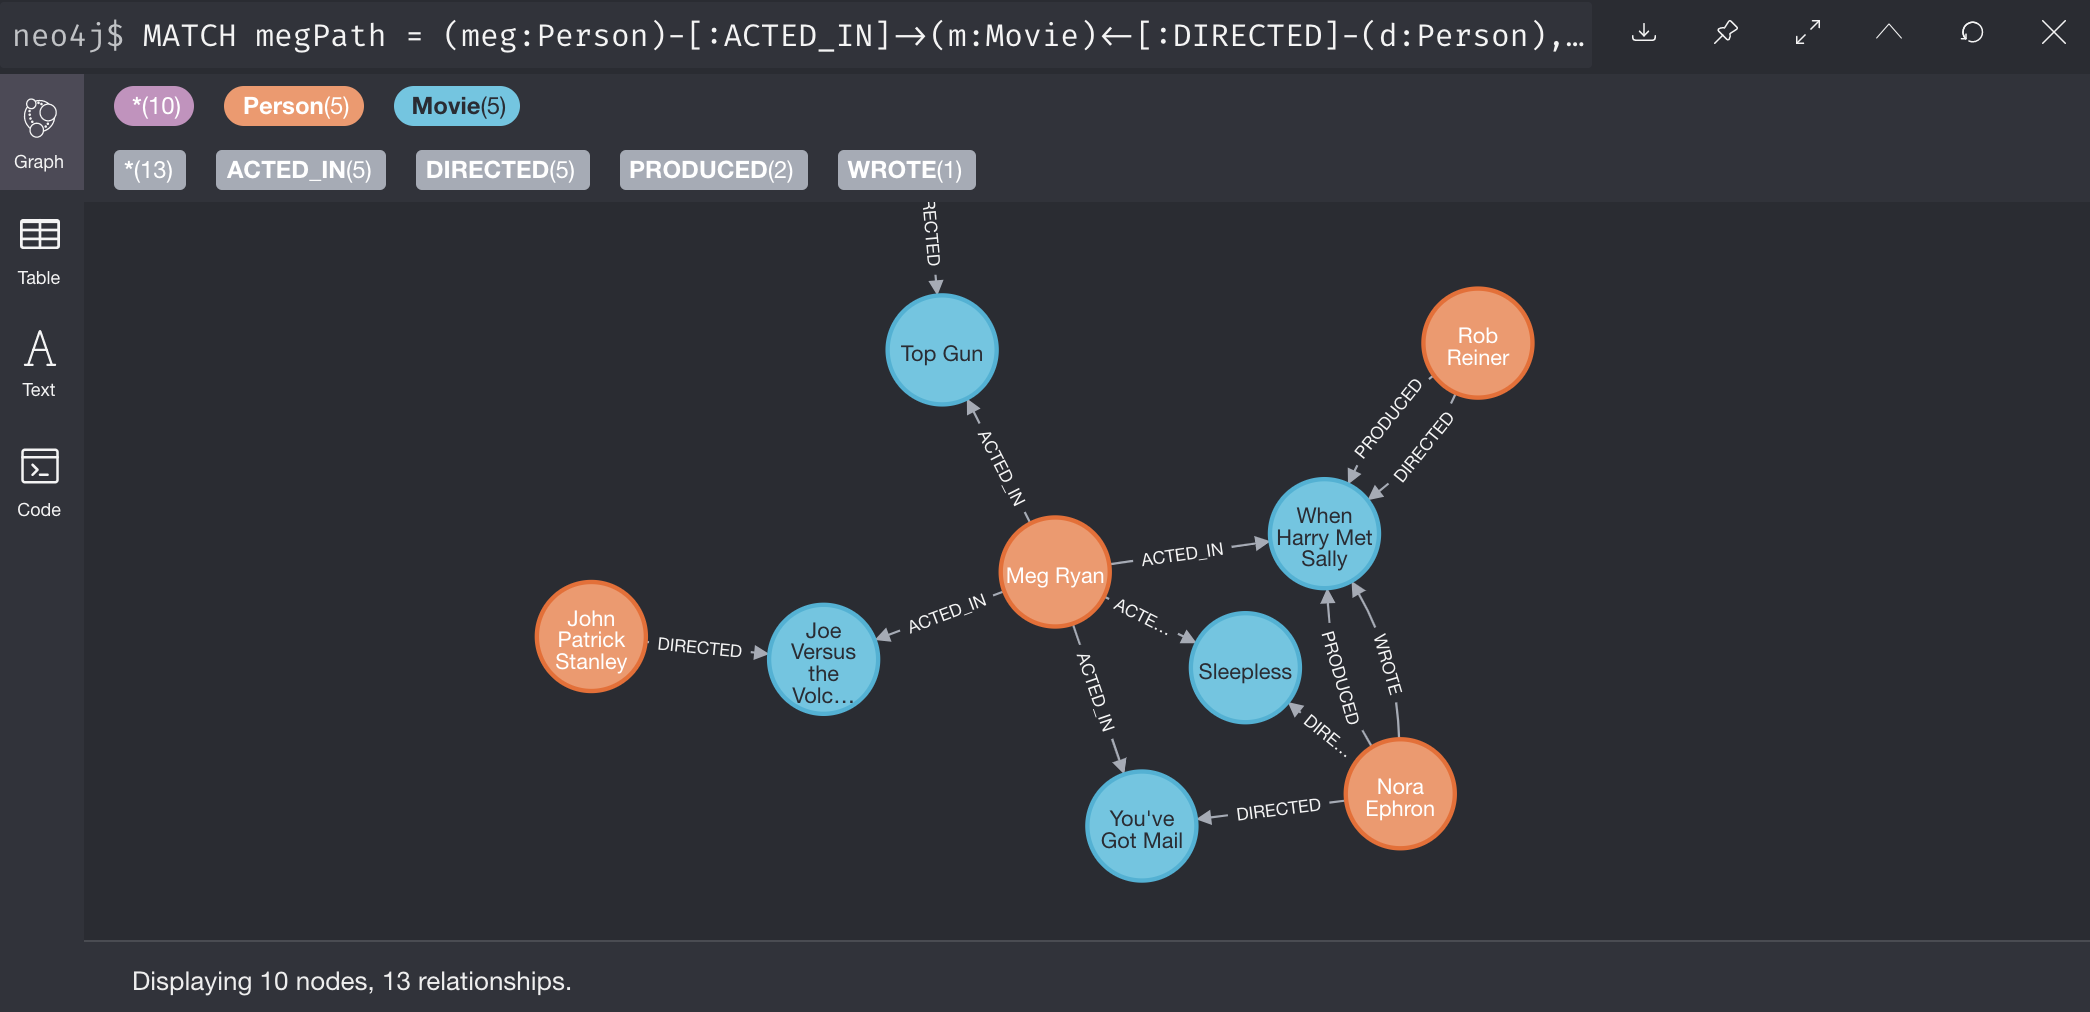

In [3]:
Image('images/meg_path.png', width=600)

#### Specifying varying length paths

Any graph that represents social networking, trees, or hierarchies will most likely have multiple paths of varying lengths. Think of the *connected* relationship in *LinkedIn* and how connections are made by people connected to more people. The *Movie* database for this training does not have much depth of relationships, but it does have the *:FOLLOWS* relationship that you learned about earlier. You write a `MATCH` clause where you want to find all of the followers of the followers of a *Person* by specifying a numeric value for the number of hops in the path. Here is an example where we want to retrieve all Person nodes that are exactly two hops away,

```
MATCH (follower:Person)-[:FOLLOWS*2]->(p:Person)
WHERE follower.name = 'Paul Blythe'
RETURN p
```

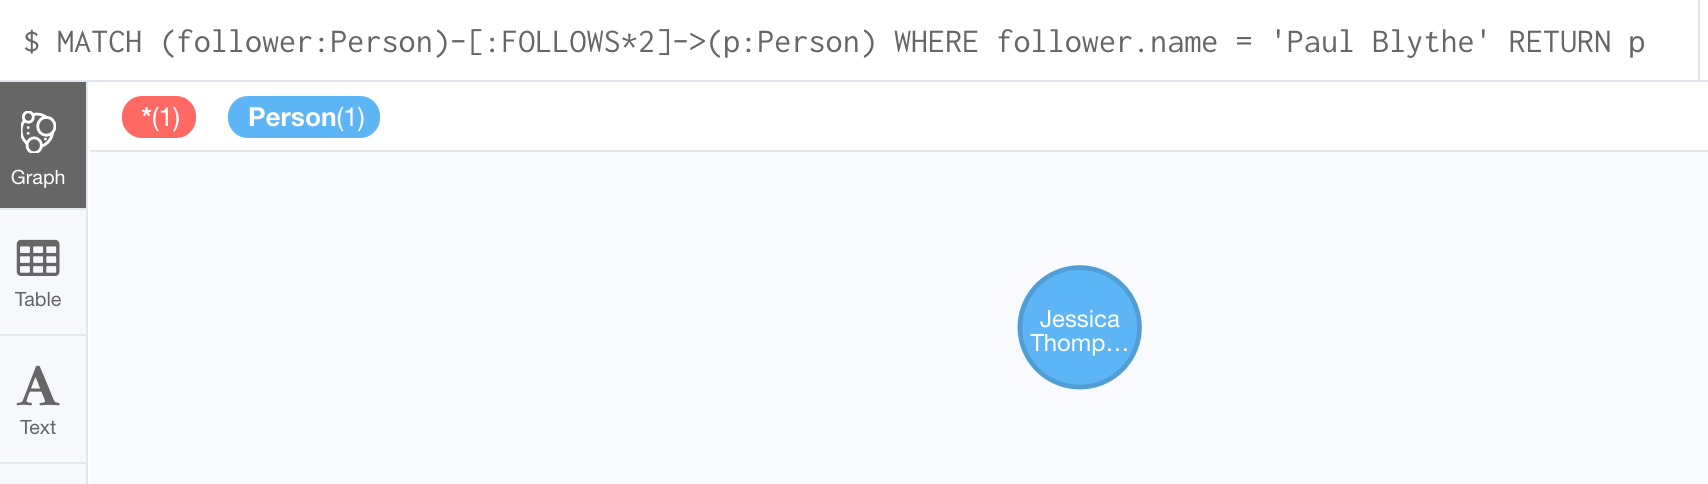

In [4]:
Image('images/two_hop_relationship.png', width=600)

If we had specified *:FOLLOWS* rather than *:FOLLOWS*2*, the query would return all Person nodes that are in the *:FOLLOWS* path from *Paul Blythe*.

Here are simplified syntax examples for how varying length patterns are specified in Cypher.

1) Retrieve all paths of any length with the relationship, *:RELTYPE* from *nodeA* to *nodeB* and beyond,

```
(nodeA)-[:RELTYPE*]->(nodeB)
```

2) Retrieve all paths of any length with the relationship, *:RELTYPE* from *nodeA* to *nodeB* or from *nodeB* to *nodeA* and beyond. This is usually a very expensive query so you should place limits on how many nodes are retrieved,

```
(nodeA)-[:RELTYPE*]-(nodeB)
```

3) Retrieve the paths of length 3 with the relationship, *:RELTYPE* from *nodeA* to *nodeB*,

```
(node1)-[:RELTYPE*3]->(node2)
```

4) Retrieve the paths of lengths 1, 2, or 3 with the relationship, *:RELTYPE* from *nodeA* to *nodeB*, *nodeB* to *nodeC*, as well as, *nodeC* to *_nodeD*) (up to three hops),

```
(node1)-[:RELTYPE*1..3]->(node2)
```

#### Finding the shortest path
A built-in function that you may find useful in a graph that has many ways of traversing the graph to get to the same node is the `shortestPath()` function. Using the shortest path between two nodes improves the performance of the query.

In this example, we want to discover a shortest path between the movies *The Matrix* and *A Few Good Men*. In our `MATCH` clause, we set the variable p to the result of calling `shortestPath()`, and then return p. In the call to `shortestPath()`, notice that we specify `*` for the relationship. This means any relationship; for the traversal.

```
MATCH p = shortestPath((m1:Movie)-[*]-(m2:Movie))
WHERE m1.title = 'A Few Good Men' AND
      m2.title = 'The Matrix'
RETURN  p
```

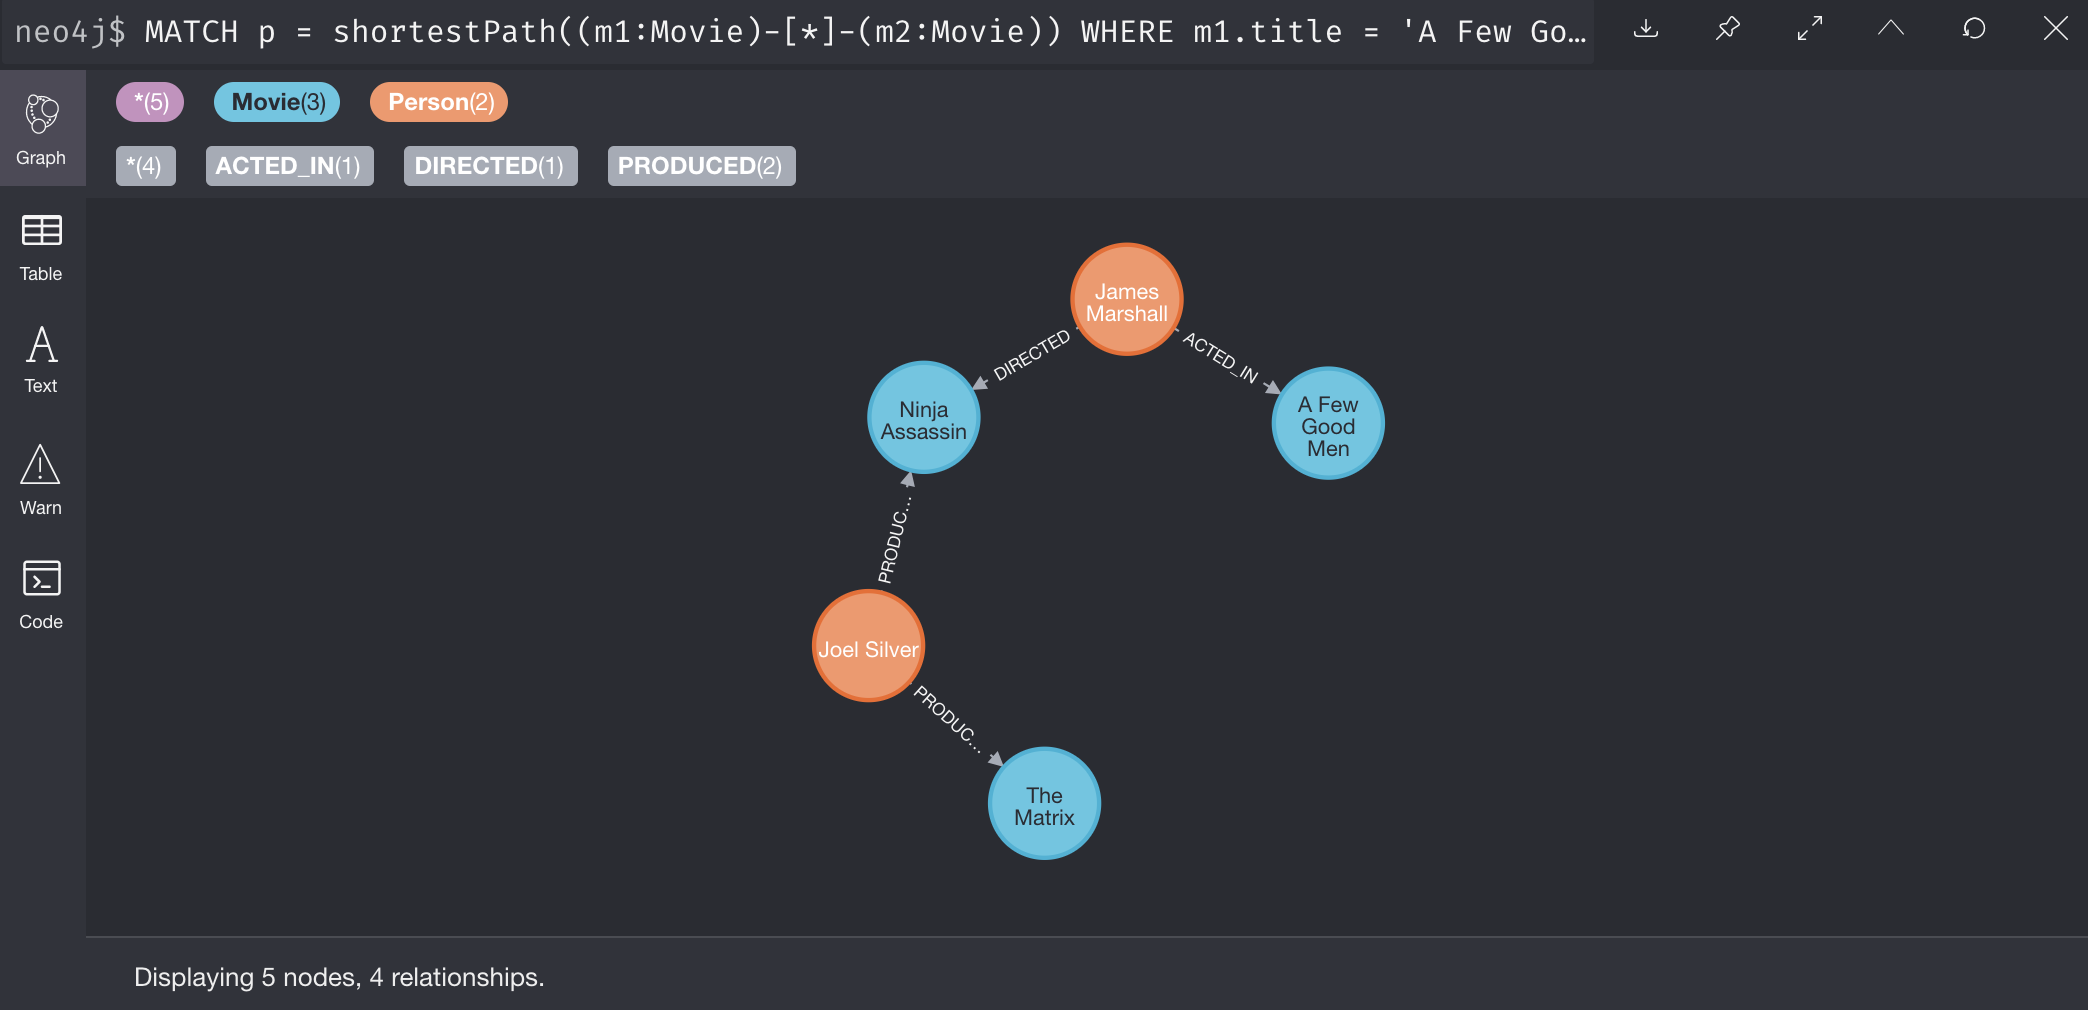

In [5]:
Image('images/shortest_path.png', width=600)

**!!!** When you use the `shortestPath()` function, the query editor will show a warning that this type of query could potentially run for a long time. You should heed the warning, especially for large graphs. When you use `ShortestPath()`, you can specify a upper limits for the shortest path. In addition, you should aim to provide the patterns for the from an to nodes that execute efficiently. For example, use labels and indexes.

#### Specifying optional pattern matching

`OPTIONAL MATCH` matches patterns with your graph, just like `MATCH` does. The difference is that if no matches are found, `OPTIONAL MATCH` will use NULLs for missing parts of the pattern. `OPTIONAL MATCH` could be considered the Cypher equivalent of the outer join in SQL.

Here is an example where we query the graph for all people whose name starts with *James*. The `OPTIONAL MATCH` is specified to include people who have reviewed movies,

```
MATCH (p:Person)
WHERE p.name STARTS WITH 'James'
OPTIONAL MATCH (p)-[r:REVIEWED]->(m:Movie)
RETURN p.name, type(r), m.title
```

Notice that for all rows that do not have the `:REVIEWED` relationship, a null value is returned for the movie part of the query, as well as the relationship.

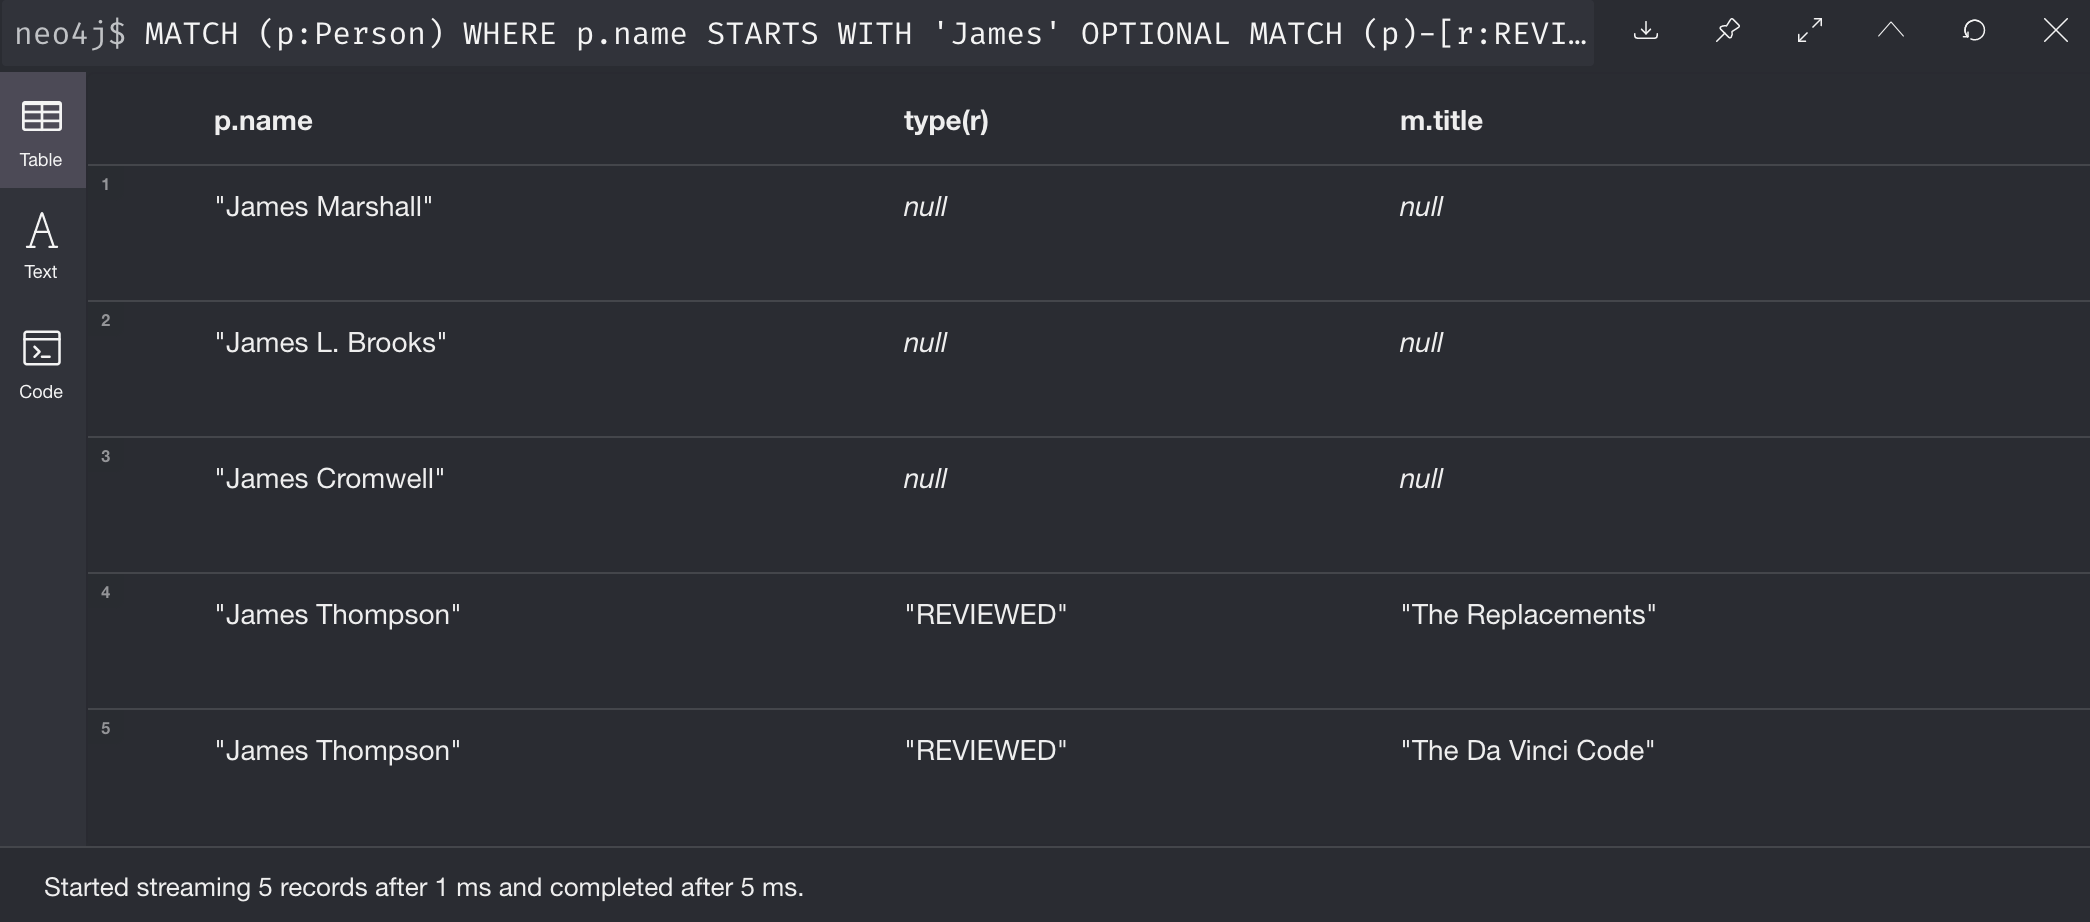

In [6]:
Image('images/optional_match.png', width=600)

#### Aggregation in Cypher

Aggregation in Cypher is different from aggregation in SQL. In Cypher, you need not specify a grouping key. As soon as an aggregation function is used, all non-aggregated result columns become grouping keys. The grouping is implicitly done, based upon the fields in the `RETURN` clause.

#### Collecting results

Cypher has a built-in function, `collect()` that enables you to aggregate a value into a list. Here is an example where we collect the list of movies that *Tom Cruise* acted in,

```
MATCH (p:Person)-[:ACTED_IN]->(m:Movie)
WHERE p.name = 'Tom Cruise'
RETURN collect(m.title) AS `movies for Tom Cruise`
```

In Cypher, there is no “GROUP BY” clause as there is in SQL. The graph engine uses non-aggregated columns as an automatic grouping key.

#### Counting results

The Cypher `count()` function is very useful when you want to count the number of occurrences of a particular query result. If you specify `count(n)`, the graph engine calculates the number of occurrences of *n*. If you specify `count(*)`, the graph engine calculates the number of rows retrieved, including those with `null` values. When you use `count()`, the graph engine does an implicit group by based upon the aggregation.

Here is an example where we count the paths retrieved where an actor and director collaborated in a movie and the `count()` function is used to count the number of paths found for each actor/director collaboration.

```
MATCH (actor:Person)-[:ACTED_IN]->(m:Movie)<-[:DIRECTED]-(director:Person)
RETURN actor.name, director.name, count(m) AS collaborations, collect(m.title) AS movies
```

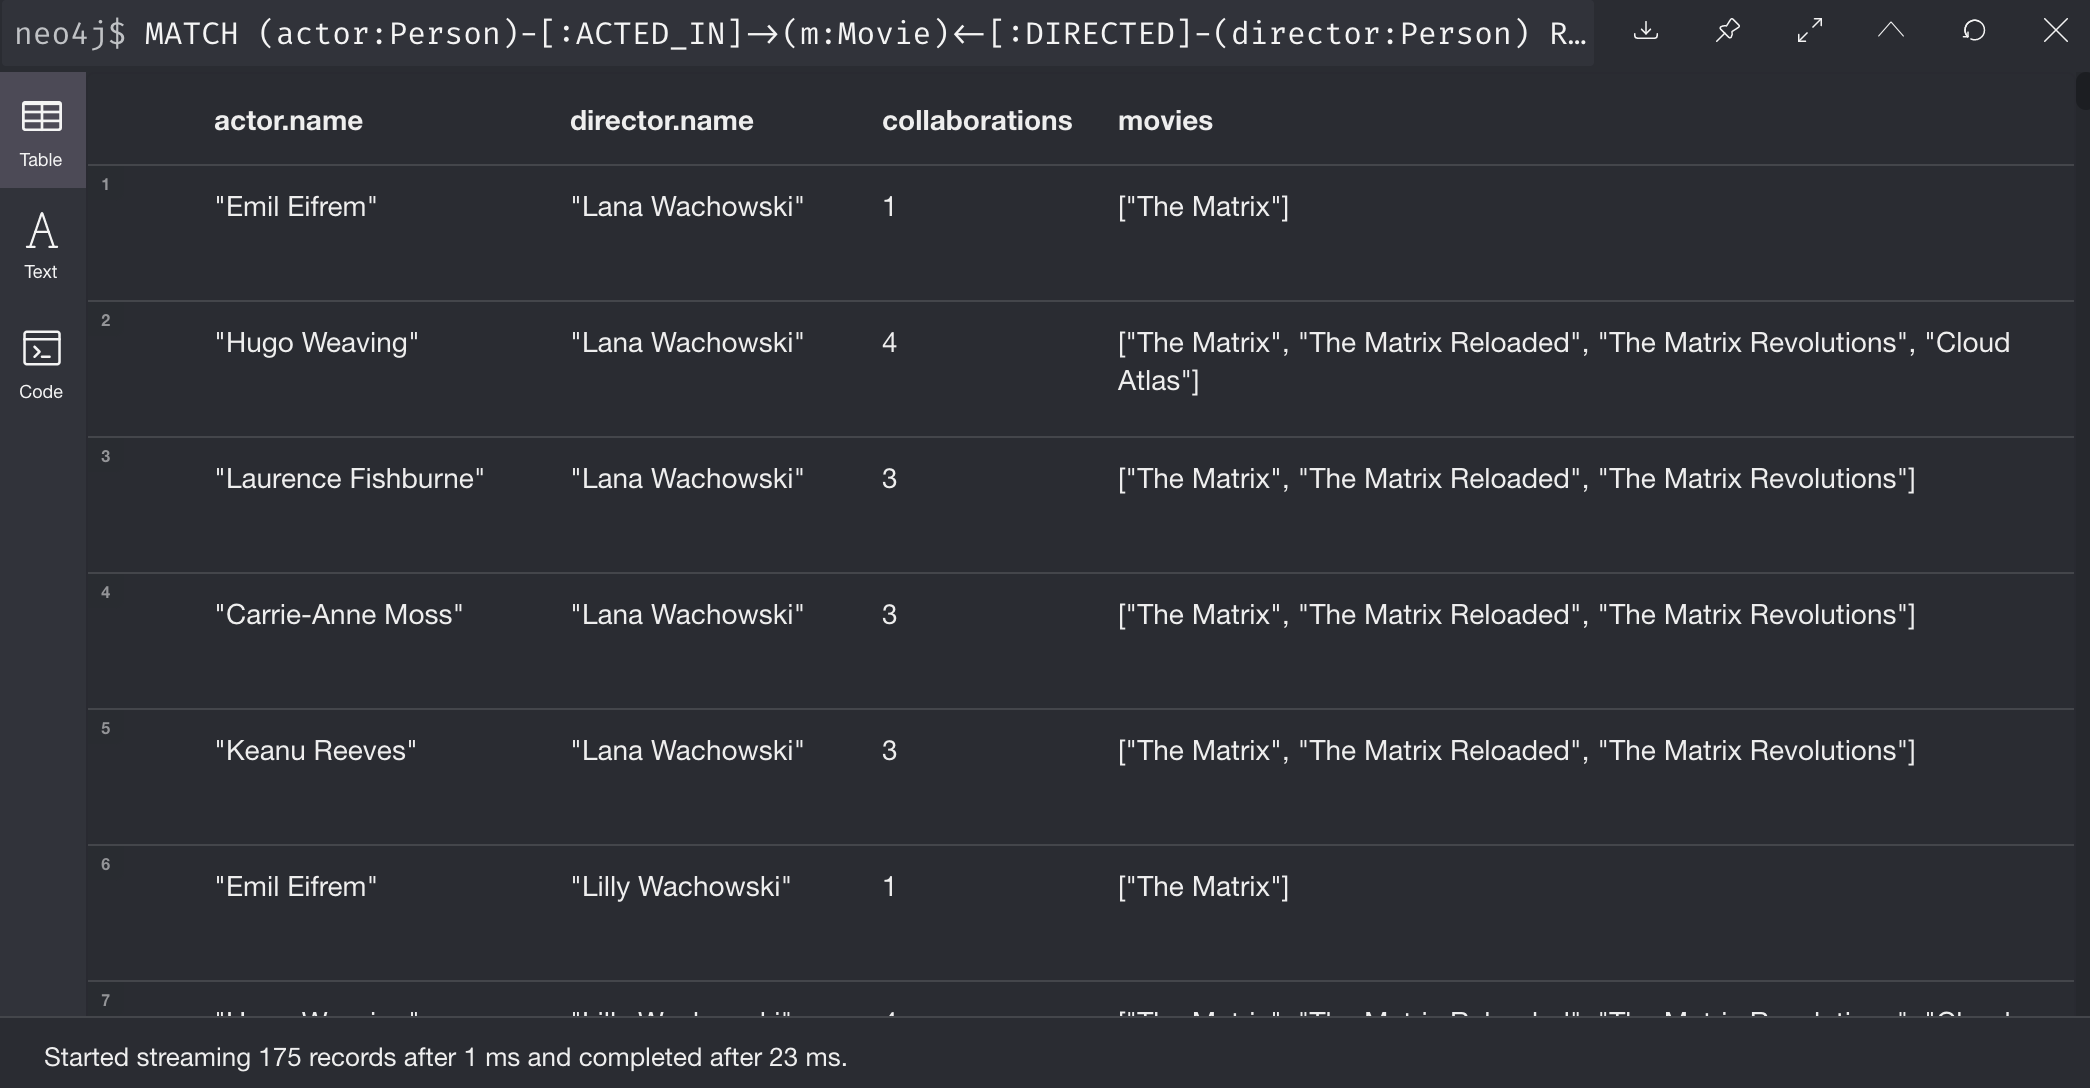

In [7]:
Image('images/actor_director_collaborations.png', width=600)

#### Additional processing using `WITH`

During the execution of a `MATCH` clause, you can specify that you want some intermediate calculations or values that will be used for further processing of the query, or for limiting the number of results before further processing is done. You use the `WITH` clause to perform intermediate processing or data flow operations.

Here is an example where we start the query processing by retrieving all actors and their movies. During the query processing, want to only return actors that have 2 or 3 movies. All other actors and the aggregated results are filtered out. This type of query is a replacement for SQL’s “HAVING” clause. The `WITH` clause does the counting and collecting, but is then used in the subsequent `WHERE` clause to limit how many paths are visited.

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH  a, count(a) AS numMovies, collect(m.title) as movies
WHERE numMovies > 1 AND numMovies < 4
RETURN a.name, numMovies, movies
```

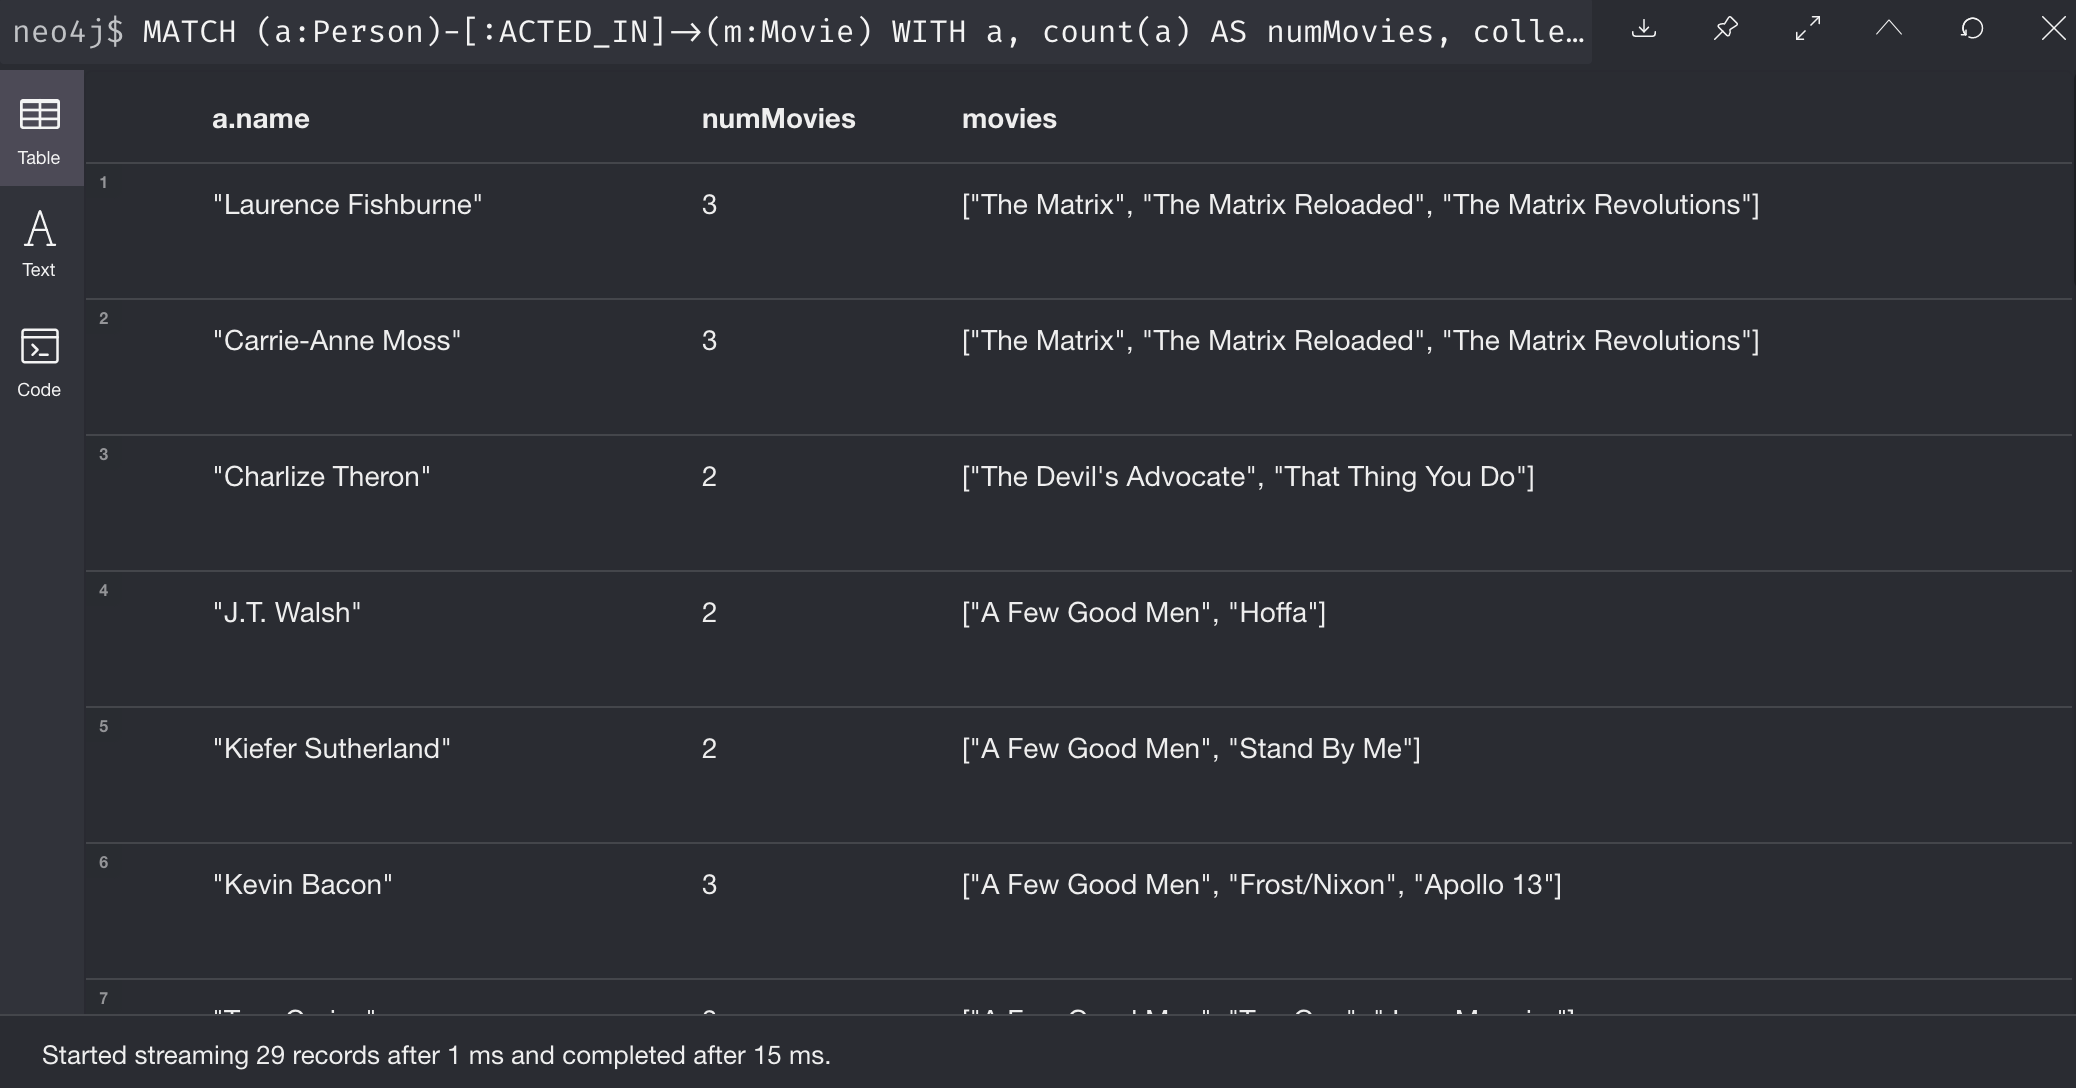

In [8]:
Image('images/actors_with_2or3_movies.png', width=600)

When you use the `WITH` clause, you specify the variables from the previous part of the query you want to pass on to the next part of the query. In this example, the variable *a* is specified to be passed on in the query, but *m* is not. Since *m* is not specified to be passed on, *m* will not be available later in the query. Notice that for the `RETURN` clause, *a*, *numMovies*, and *movies* are available for use.

Notice that, you have to name all expressions with an alias in a `WITH` that are not simple variables.

Here is another example where we want to find all actors who have acted in at least five movies, and find (optionally) the movies they directed and return the person and those movies.

```
MATCH (p:Person)
WITH p, size((p)-[:ACTED_IN]->(:Movie)) AS movies
WHERE movies >= 5
OPTIONAL MATCH (p)-[:DIRECTED]->(m:Movie)
RETURN p.name, m.title
```

In this example, we first retrieve all people, but then specify a pattern in the `WITH` clause where we calculate the number of `:ACTED_IN` relationships retrieved using the `size()` function. If this value is greater than five, we then also retrieve the `:DIRECTED` paths to return the name of the person and the title of the movie they directed. In the result, we see that these actors acted in more than five movies, but *Tom Hanks* is the only actor who directed a movie and thus the only person to have a value for the movie.

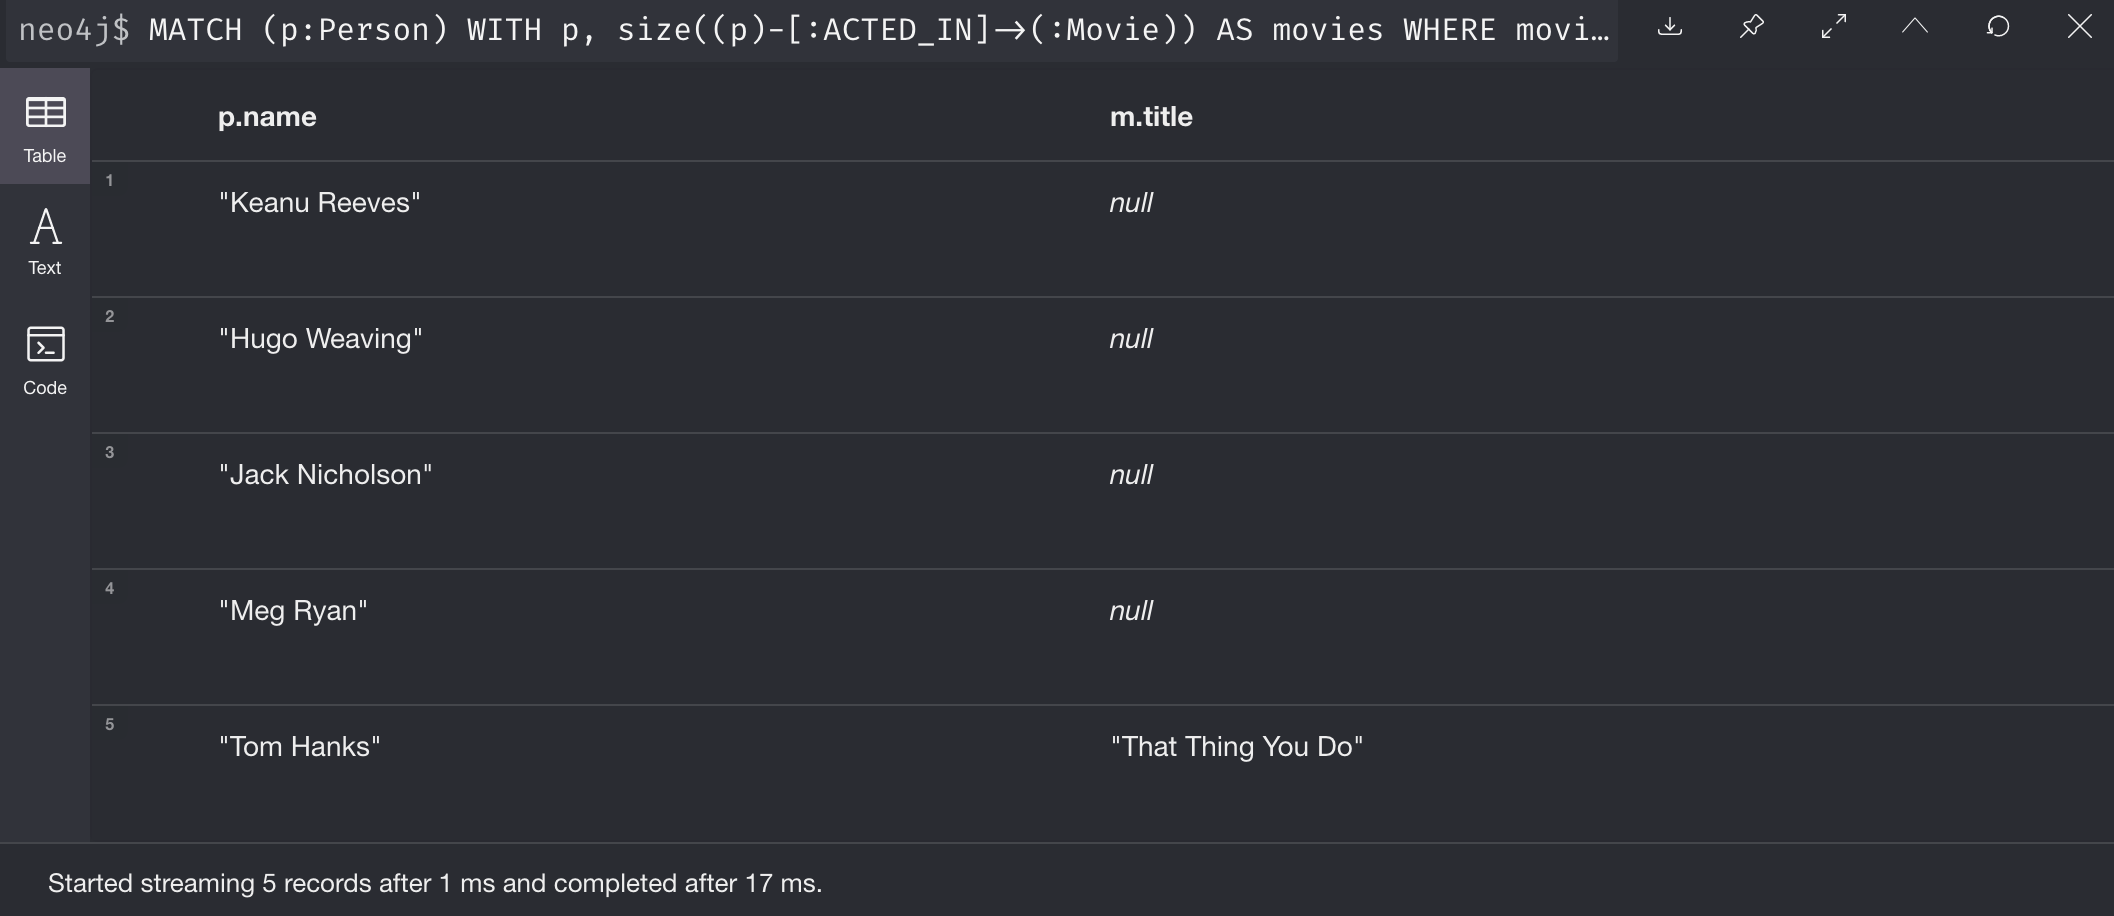

In [9]:
Image('images/popular_actors_with_at_least5_movies.png', width=600)

#### Controlling how results are returned

You have seen a number of query results where there is duplication in the results returned. In most cases, you want to eliminate duplicated results. You do so by using the `DISTINCT` keyword.

Here is a simple example where duplicate data is returned. *Tom Hanks* both acted in and directed the movie, *That Thing You Do*, so the movie is returned twice in the result stream,

```
MATCH (p:Person)-[:DIRECTED | :ACTED_IN]->(m:Movie)
WHERE p.name = 'Tom Hanks' AND m.released = 1996
RETURN m.released, collect(m.title) AS movies
```

We can eliminate the duplication by specifying the `DISTINCT` keyword as follows,

```
MATCH (p:Person)-[:DIRECTED | :ACTED_IN]->(m:Movie)
WHERE p.name = 'Tom Hanks'
RETURN m.released, collect(DISTINCT m.title) AS movies
```

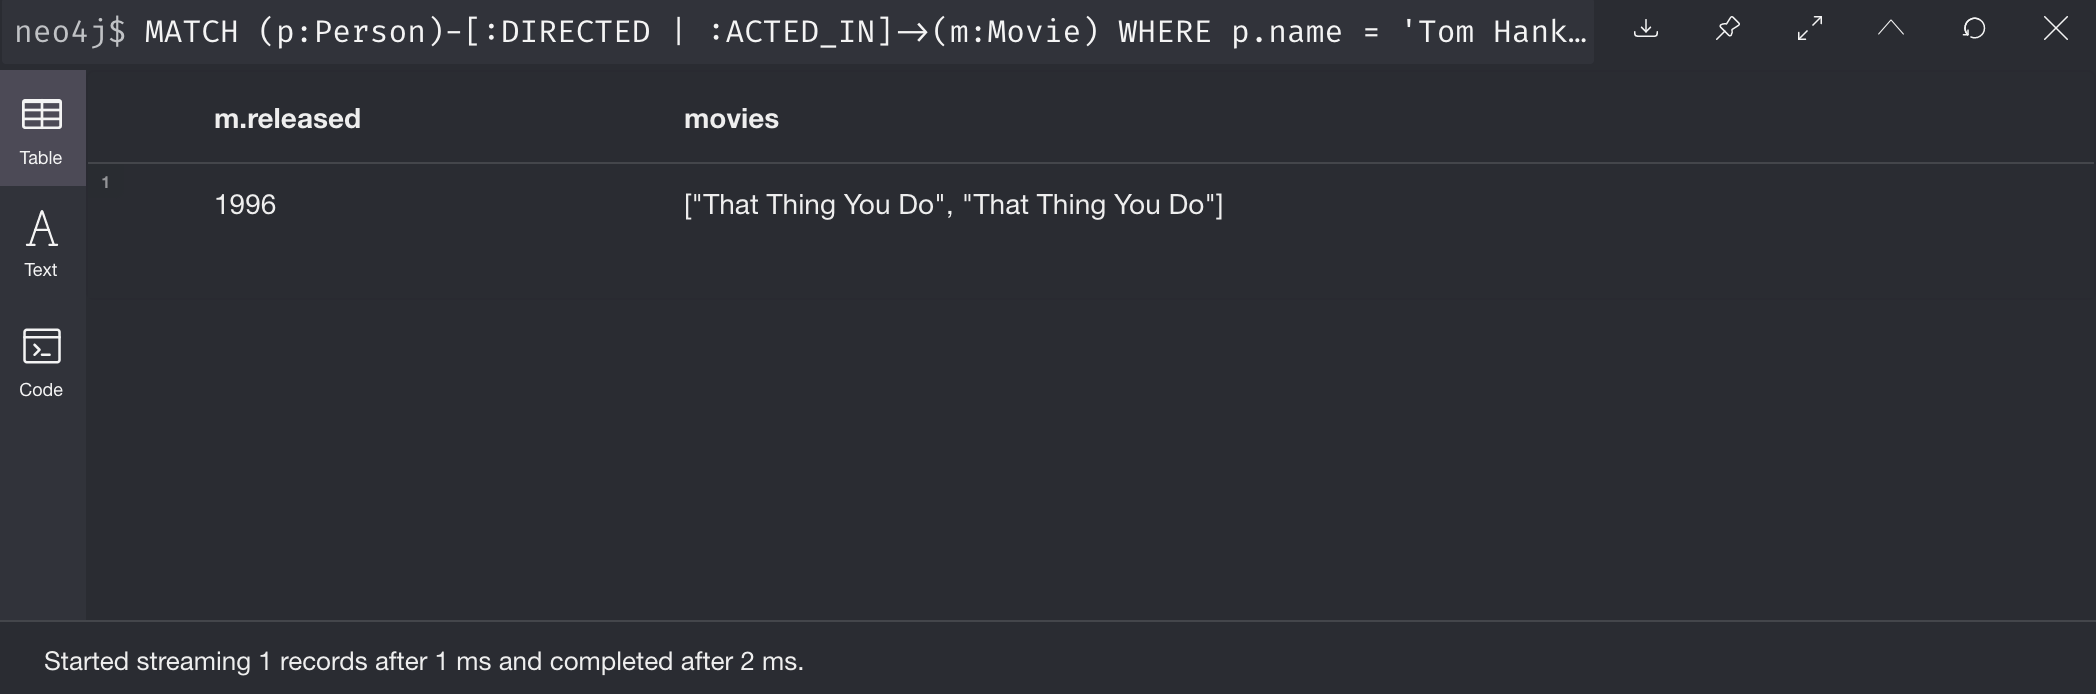

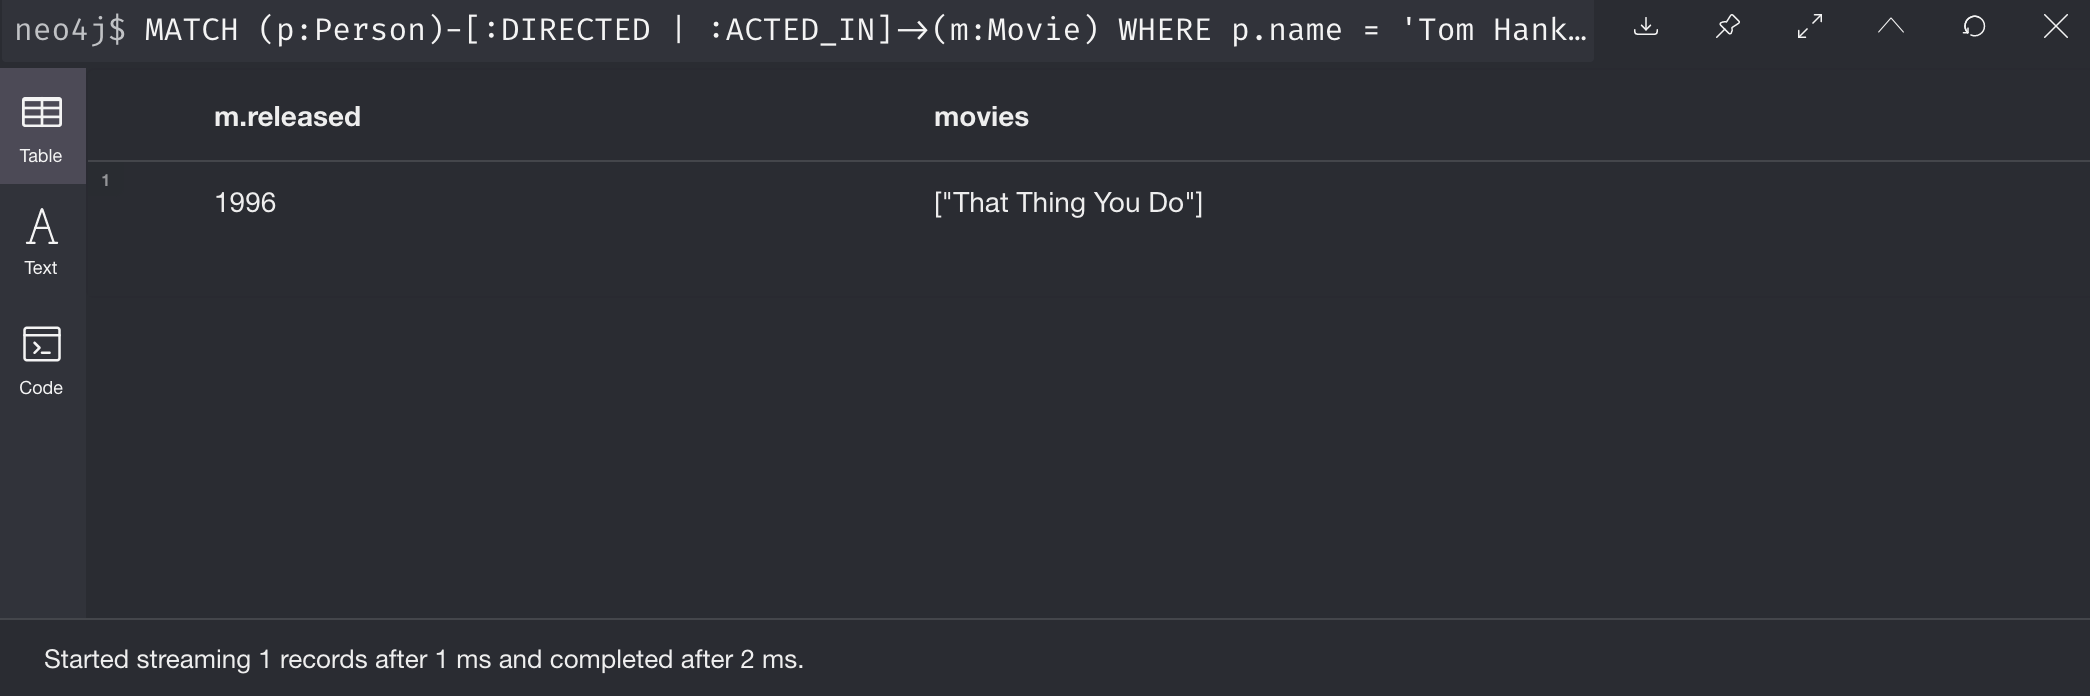

In [10]:
x = Image('images/duplication.png', width=600)
y = Image('images/no_duplication.png', width=600)

display(x, y)

#### Using `WITH` and `DISTINCT` to eliminate duplication

```
MATCH (p:Person)-[:DIRECTED | :ACTED_IN]->(m:Movie)
WHERE p.name = 'Tom Hanks'
WITH DISTINCT m
RETURN m.released, m.title
```

#### Ordering results

If you want the results to be sorted, you specify the expression to use for the sort using the `ORDER BY` keyword and whether you want the order to be descending using the `DESC` keyword. Ascending order is the default. Note that you can provide multiple sort expressions and the result will be sorted in that order. Just as you can use `DISTINCT` with `WITH` to eliminate duplication, you can use `ORDER BY` with `WITH` to control the sorting of results.

```
MATCH (p:Person)-[:DIRECTED | :ACTED_IN]->(m:Movie)
WHERE p.name = 'Tom Hanks'
RETURN m.released, collect(DISTINCT m.title) AS movies ORDER BY m.released DESC
```

#### Limiting the number of results

Although you can filter queries to reduce the number of results returned, you may also want to limit the number of results. This is useful if you have very large result sets and you only need to see the beginning or end of a set of ordered results. You can use the `LIMIT` keyword to specify the number of results returned. Furthermore, you can use the `LIMIT` keyword with the `WITH` clause to limit results.

```
MATCH (m:Movie)
RETURN m.title as title, m.released as year ORDER BY m.released DESC LIMIT 10
```

#### Controlling the number of results using `WITH`

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH a, count(*) AS numMovies, collect(m.title) as movies
WHERE numMovies = 5
RETURN a.name, numMovies, movies
```

#### Working with Cypher data

##### Lists

There are many built-in Cypher functions that you can use to build or access elements in lists. A Cypher `map` is list of key/value pairs where each element of the list is of the format key: value. For example, a map of months and the number of days per month could be,

```
[Jan: 31, Feb: 28, Mar: 31, Apr: 30 , May: 31, Jun: 30 , Jul: 31, Aug: 31, Sep: 30, Oct: 31, Nov: 30, Dec: 31]
```

You can collect values for a list during a query and when you return results, you can sort by the size of the list using the size() function as follows,

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH  m, count(m) AS numCast, collect(a.name) as cast
RETURN m.title, cast, numCast ORDER BY size(cast)
```

##### Unwinding lists

There may be some situations where you want to perform the opposite of collecting results, but rather separate the lists into separate rows. This functionality is done using the `UNWIND` clause.

Here is an example where we create a list with three elements, unwind the list and then return the values. Since there are three elements, three rows are returned with the values,

```
WITH [1, 2, 3] AS list
UNWIND list AS row
RETURN list, row
```

**!!!** Notice that there is no `MATCH` clause. You need not query the database to execute Cypher statements, but you do need the `RETURN` clause here to return the calculated values from the Cypher query.

**!!!** The `UNWIND` clause is frequently used when importing data into a graph.

##### Dates

Cypher has a built-in `date()` function, as well as other temporal values and functions that you can use to calculate temporal values. You use a combination of numeric, temporal, spatial, list and string functions to calculate values that are useful to your application. For example, suppose you wanted to calculate the age of a Person node, given a year they were born (the born property must exist and have a value).

```
MATCH (actor:Person)-[:ACTED_IN]->(:Movie)
WHERE exists(actor.born)
WITH DISTINCT actor, date().year  - actor.born as age
RETURN actor.name, age as `age today`
ORDER BY actor.born DESC
```

#### QUIZ

**Q1)** Suppose you want to add a WHERE clause at the end of this statement to filter the results retrieved.

`MATCH (p:Person)-[rel]->(m:Movie)<-[:PRODUCED]-(:Person)`

What variables, can you test in the WHERE clause?

- &#9745; p
- &#9745; rel
- &#9745; m
- &#9744; PRODUCED

**Q2)** Suppose you want to retrieve all movies that have a released property value that is 2000, 2002, 2004, 2006, or 2008. Here is an incomplete Cypher example to return the title property values of all movies released in these years.

```
MATCH (m:Movie)
WHERE m.released XX [2000, 2002, 2004, 2006, 2008]
RETURN m.title
```

What keyword do you specify for XX?

- &#9744; CONTAINS
- &#9745; IN
- &#9744; IS
- &#9744; EQUALS

**Q3)** Given this Cypher query,

```
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WITH  m, count(m) AS numMovies, collect(m.title) as movies
WHERE numMovies > 1 AND numMovies < 4
RETURN //??
```

What variables or aliases can be used to return values?

- &#9744; a
- &#9745; m
- &#9745; numMovies
- &#9745; movies